# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import seaborn as sns
import numpy as np
%matplotlib inline

/Users/nied/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
#df_raw = pd.read_csv("../assets/admissions.csv")
df_raw = pd.read_csv("/Users/nied/GeneralAssembly_DataScience/DAT-NYC-7.24.17/projects/unit-projects/project-2/assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [5]:
#function
df_raw.describe()

admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: 
For each variable, the standard deviation refers to the dispersion or distance between the data points and the mean. In this case GRE scores have a larger dispertion than the GPA scores. 

#### Question 4. Drop data points with missing data


In [6]:
df_nonas = df_raw.dropna()

In [7]:
df_nonas.head()

admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

In [8]:
df_nonas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [9]:
df_raw.isnull()

admit    gre    gpa  prestige
0    False  False  False     False
1    False  False  False     False
2    False  False  False     False
3    False  False  False     False
4    False  False  False     False
5    False  False  False     False
6    False  False  False     False
7    False  False  False     False
8    False  False  False     False
9    False  False  False     False
10   False  False  False     False
11   False  False  False     False
12   False  False  False     False
13   False  False  False     False
14   False  False  False     False
15   False  False  False     False
16   False  False  False     False
17   False  False  False     False
18   False  False  False     False
19   False  False  False     False
20   False  False  False     False
21   False  False  False     False
22   False  False  False     False
23   False  False  False     False
24   False  False  False     False
25   False  False  False     False
26   False  False  False     False
27   False  False  False     False
28   False  False  False     False
29   False  False  False     False
..     ...    ...    ...       ...
370  False  False  False     False
371  False  False  False     False
372  False  False  False     False
373  False  False  False     False
374  False  False  False     False
375  False  False  False     False
376  False  False  False     False
377  False  False  False     False
378  False  False  False     False
379  False  False  False     False
380  False  False  False     False
381  False  False  False     False
382  False  False  False     False
383  False  False  False     False
384  False  False  False     False
385  False  False  False     False
386  False  False  False     False
387  False  False  False     False
388  False  False  False     False
389  False  False  False     False
390  False  False  False     False
391  False  False  False     False
392  False  False  False     False
393  False  False  False     False
394  False  False  False     False
395  False  False  False     False
396  False  False  False     False
397  False  False  False     False
398  False  False  False     False
399  False  False  False     False

[400 rows x 4 columns]

In [10]:
df_raw.isnull().sum() 

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [11]:
df_nonas.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [12]:
df_raw [pd.isnull(df_raw).any(axis=1)]

admit    gre   gpa  prestige
187      0    NaN   NaN       2.0
212      0    NaN  2.87       2.0
236      1  660.0   NaN       NaN

In [13]:
df_raw.iloc[[187, 212, 236]]

admit    gre   gpa  prestige
187      0    NaN   NaN       2.0
212      0    NaN  2.87       2.0
236      1  660.0   NaN       NaN

In [14]:
df_nonas.iloc[[187, 212, 236]]

admit    gre   gpa  prestige
188      0  560.0  3.07       2.0
214      1  600.0  3.56       2.0
239      0  700.0  3.45       3.0

Answer: 
The number of rows will be lower in the new data frame. I can identify and subset the rows with NaN values in the original data frame and look for them in the new data frame, where the change will be obvious. Alternatively I could subset the na rows using the value of the columns with values. 

#### Question 6. Create box plots for GRE and GPA

In [29]:
df_nonas.describe()

admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000

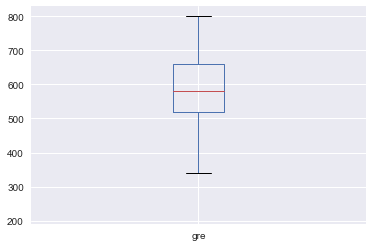

In [15]:
#boxplot 1
df_nonas.boxplot('gre')

In [16]:
df_nonas.median()

admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000

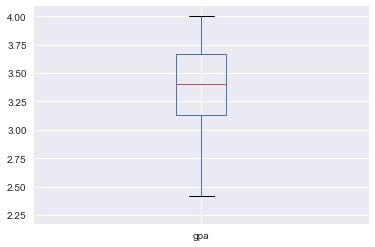

In [28]:
#boxplot 2 
df_nonas.boxplot('gpa')

#### Question 7. What do this plots show?

Answer: 
GRE: The box shows that 50% of the students got a GRE score between 520 and 660. The location of the median in the box suggests the data is slightly skewed to the right.  
GPA: The box shows that 50% of the students got a GRE score between 313 and 367. The length of the upper and lower fences shows that there is more variance in the scores from students with lower than higher GPA.

#### Question 8. Describe each distribution 

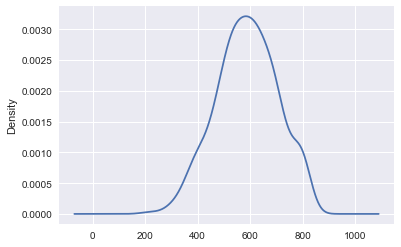

In [19]:
# plot the distribution of each variable 
df_nonas['gre'].plot(kind="density")

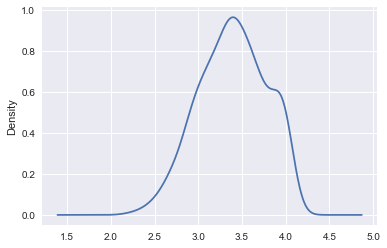

In [20]:
df_nonas['gpa'].plot(kind="density")

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [21]:
df_nonas[['gre', 'gpa']].skew()

gre   -0.146047
gpa   -0.216889
dtype: float64

In [22]:
df_nonas[['gre', 'gpa']].kurt()

gre   -0.332864
gpa   -0.563570
dtype: float64

Answer:
No, a normal distribution has a skewness value of 0 and we did not obtain it for any of our variables 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer:
Yes 

#### Question 11. Which of our variables are potentially colinear? 
Answer: 
GRE and GPA scores

In [23]:
# create a correlation matrix for the data
df_nonas.corr()

admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000

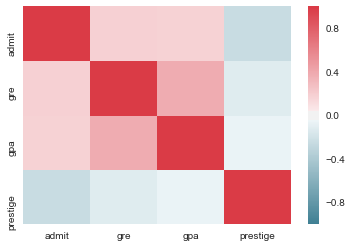

In [24]:
sns.heatmap(df_nonas.corr(), cmap = sns.diverging_palette(220, 10, as_cmap=True))

#### Question 12. What did you find?

Answer:
1. Prestige and admission have an inverse correlation meaning that if the prestige of the university is low (the lowest number, the higher the prestige) the admissions rate is high and viceversa.
2. GPA and GRE score have a higher correlation between each other than each score with admission rate. In other words students that get a high score in the GRE tend to get a high gpa and this is also true for the opposite.
3. GPA and GRE are not correlated with the prestige of the undergraduate schools

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:

Using data from individuals that applied to graduate school define the factors that predict the probability of a student of being admitted or not. The data collected includes GRE and GPA scores as well as the prestige of the undergrad school of each student.
1 - Read dataset (admissions.csv)
2 - Remove data from students with missing information (features).
3 - Calculate descriptive statistics and create visual representations of them including box and density plots to observe feature distribution.
4 - Determine if the data has a normal distribution and if it requires transformation before making any assumption.
5 - Asses the correlation of variables and based on this analysis make decision on which variables may be dropped (if two variables are highly correlated, you may want to drop one of them as it is not really necessary). 
6 - Using the analyses above explain data patterns and make any adjustments to the data before making assumptions about the features that influence students admission success into graduate school.
7 - Create a summary/report.

#### Question 14. What is your hypothesis? 

Answer: GRE, GPA scores and undergrad school prestige do not predict admission of students into graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

In [25]:
np.log2(df_nonas[['gre','gpa']])

gre       gpa
0    8.569856  1.851999
1    9.366322  1.875780
2    9.643856  2.000000
3    9.321928  1.673556
4    9.022368  1.550901
5    9.569856  1.584963
6    9.129283  1.575312
7    8.643856  1.622930
8    9.076816  1.761285
9    9.451211  1.970854
10   9.643856  2.000000
11   8.781360  1.687061
12   9.569856  2.000000
13   9.451211  1.622930
14   9.451211  2.000000
15   8.906891  1.782409
16   9.607330  1.952334
17   8.491853  1.356144
18   9.643856  1.906891
19   9.076816  1.929791
20   8.965784  1.664483
21   9.366322  1.859970
22   9.228819  1.495695
23   9.409391  1.673556
24   9.569856  1.744161
25   9.643856  1.871844
26   9.276124  1.851999
27   9.022368  1.903038
28   9.607330  1.687061
29   9.022368  1.718088
..        ...       ...
370  9.076816  1.914565
371  9.409391  1.910733
372  9.409391  1.275007
373  9.276124  1.752749
374  9.129283  1.918386
375  9.129283  1.803227
376  9.276124  1.859970
377  9.643856  2.000000
378  9.321928  1.641546
379  9.076816  1.432959
380  9.451211  1.867896
381  9.076816  1.803227
382  9.076816  1.811471
383  9.366322  2.000000
384  8.906891  1.389567
385  8.714246  1.594549
386  9.531381  1.948601
387  9.179909  1.748461
388  9.321928  1.664483
389  9.321928  1.811471
390  9.643856  1.608809
391  9.366322  1.956057
392  9.228819  1.757023
393  9.276124  1.906891
394  8.845490  1.996389
395  9.276124  2.000000
396  9.129283  1.604071
397  8.845490  1.395063
398  9.451211  1.867896
399  9.228819  1.959770

[397 rows x 2 columns]

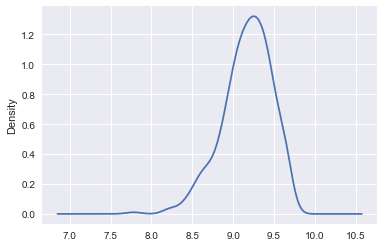

In [26]:
np.log2(df_nonas['gre']).plot(kind="density")

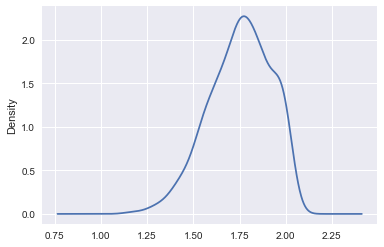

In [27]:
np.log2(df_nonas['gpa']).plot(kind="density")

#### 3. Advanced: Impute missing data